# Bugs and revision control

In [ ]:
## PHZ3150 10.19.2021

<img src="xkcd_debug.jpeg" width=350 height=350 />

### When writing a script/code think what you want to do and keep an eye for the details of what you are typing. 


###  1. Misplaced characters and wrong use of variables/math can result in your code not working --> will get error messages & will take some debugging: 

In [1]:
#e.g.,:
a = 1 

while a < 20 : print ('working!', a )
    a = a +1 
    

IndentationError: unexpected indent (<ipython-input-1-741ddbd61ddf>, line 5)

In [2]:
# --> error already tells us what is wrong:
a = 1 

while a < 20 : 
    print ('working!', a)
    a = a +1 

working! 1
working! 2
working! 3
working! 4
working! 5
working! 6
working! 7
working! 8
working! 9
working! 10
working! 11
working! 12
working! 13
working! 14
working! 15
working! 16
working! 17
working! 18
working! 19


### 2) Worst, they can make your code appear to work and *not* give any error messages while the code does not do what it is supposed to!  --> you need some trigger to realize & can take a lot of debugging

In [ ]:
# if you try to run this use the Interupt kernel button after some point; why?
a = 1 

while a < 10 : 
    print ('working!')
a = a +1 

### You need to always TEST the code to make sure it does what you want
### Best practice: write little snippets of code and test them

### **Test often, test different cases!**  


### 3) Sometimes code doesn’t do what you want it to do, or doesn’t do anything at all

### “First, try getting away from the computer for a few minutes. Computers emit waves that affect the brain, causing these effects:
- Frustration and/or rage.
- Superstitious beliefs ( the computer hates me ) and magical thinking ( the program only works when I wear my hat backward ).
- Random-walk programming (the attempt to program by writing every possible program and choosing the one that does the right thing).”

Source: ThinkPython2


### Remember StackOverflow numpy.org etc can be your best friends
<img src="xkcd_find_help_bug.jpeg" width=350 height=350 />
source:xkcd

### Debugging can take (much more) time if you have to go over large pieces of code. Try to test your code often when adding features to it.

### Traditional way of debugging: use print() to print variables etc at different parts of the code, till you figure out what is broken (e.g., does the code ever *really* enter that function you created, and does it return what it was supposed to?)


### Python offers tools to for debugging: pdb

### Need to import it and then you can use it from terminal (even ‘post mortem’), Jupyter notebook or Spyder

- import pdb  

- breakpoint()  --> since 3.7 the proper way to do it. Python freezes and waits for you to give it a command (for older Python versions you may see  pdb.set_trace())

- n: move in the next line/stay in the same block of code
- s: move at the  next possible occasion (could be in another function  
    that is called)
- l & ll : to list the code 
- p: print an expression 
- s: execute current line and stop at the first possible occasion
- c: continue until a breakpoint is encountered
- q: quit


### We will start with some traditional debugging so that you get a handle of bugs and then move to the Python tools

In [ ]:
#### let's do our imports first:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#Is this buggy? If so, debug!

#code that aims to tell you if a number equals 1 or 10
num = int(input("Give me a number:"))

if num == 10 or num == 1:
    print('the number is 10 or 1')
else:
    print('the number is not 10 or 1')

Give me a number:5
the number is not 10 or 1


In [ ]:
# oops! there is sth wrong. but what?

In [ ]:
#Is this buggy? If so, debug!

#code that aims to find the minimum number in a list:
random_list = [15, 22, 12, 7, 33, 8, 10, 9, 100, 2, -4, 5]

min_list=random_list[0]

for i in random_list:
    if i == min_list:   
        min_list = i 
        
print( min_list )

In [ ]:
### oops! wrong again. How do we fix it?


In [ ]:
#Is this buggy? If so, debug!

#code that aims to order a list with strings from shortest to longest word:
random_list  = ["May", "be", "this",  "a",  "string"]

ordered_list = []
len_list = []

for i in range( len(random_list) ):
      
    if i == 0:
        ordered_list.append (random_list[i]  )
        len_list.append( len( random_list[i] ) )
    else:
        q = len( random_list[i] )
        print( i , random_list[i], np.max( len_list ), np.min( len_list ))
  
        if len( random_list[i] ) < np.max( len_list ):
            ordered_list.append( random_list[ i ] )
            
            print( 'larger:', ordered_list )
            
        if len( random_list[i] ) < np.min( len_list ):
            ordered_list.reverse()
            
            ordered_list.append( random_list[i ] )
            
            print( 'smaller:', ordered_list )
                        
                                                                                         
print( ordered_list ) 

In [5]:
#Is this buggy? If so, debug!

#code that calculates the volume of a sphere of radius R :

def volume(radius):
    """Calculates the volume of a sphere of radius R  
    Input: R (m)
    Output: V (m$^3$)"""

    
    volume = (4./3.) * np.pi * (radius**3)
    
    return(volume)



r = volume(4)
print( r )

r = volume(12)
print( r )

268.082573106329
7238.229473870882


In [ ]:
#code that asks the user to input two times and two radii and prints the acceleration of a body
def acceleration(time1,time2,speed1,speed2):
    """Calculates the acceleration of object between times t1 and t2 
    when speeds were u1 and u2 respectively"""

    a = (speed2 - speed1)/ (time2-time1)
    
    return(a)

t1 = float(input("Give time 1: "))
t2 = float(input("Give time 2: "))
u1 = float(input("Give speed 1: "))
u2 = float(input("Give speed 2: "))

print('Acceleration was: ', acceleration(u1,u2,t1,t2))


In [9]:
#Code that gets three values for the time (t), speed (u) and displacement (d) of a body and 
# keeps only the ones that are physically correct (so the ones for which u = d/t)

t = np.arange(0.1, 10.1, 0.1)
d = np.arange(0, 30, 0.3)
u = np.arange(0, 20.2, 0.2)


cor = np.zeros( (len( u ), len( d ), len( t ) ) )

for i in range( len( u ) ):
    for j in range( len( d ) ):
        for k in range( len( t ) ):
            
            if u[ i ] == d[ j ] / t[ k ] :
                #print('found physically correct case!')
                
                cor[ i, j, k ] = u[ i ]
            
print( cor[ cor > 0 ] )

[ 0.2  0.4  0.8  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.4  1.6  1.8  1.8  1.8  1.8  1.8
  2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.
  2.   2.   2.   2.   2.2  2.2  2.2  2.6  2.6  2.8  3.   3.   3.   3.
  3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
  3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
  3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
  3.   3.   3.   3.   3.2  3.6  3.6  3.6  3.6  3.8  4.   4.   4.   4.
  4.   4.   4.   4.   4.   4.   4.2  4.2  4.2  4.2  4.2  4.2  4.2  4.2
  4.4  5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.4
  5.4  6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.
  6.   6.   6.   6.   6.   6.   6.   6.   7.   7.   8.   8.   8.4  8.4
  8.4  8.6  8.6  9.   9.   9.   9.   9.   9.   9.   9.   9.   9.  10.
 10.  10.  10.  11.  11.  11.4 11.4 11.4 12.  12.  12.  12.  12.  12.
 12.  12.  13.  

In [ ]:
#Code that aims to tell you if a value in an input list is positive, zero or negative:

a1 = [ 1, -9, 2, 1/np.exp(1), np.cos(np.pi), np.sin(0), 
      np.sin(np.pi), np.exp(-9), np.log(1e-5) ]

#let's see our array:
print( a1 )

#loop with a while:

i = 0 

while i < len(a1):
    a = i
    
    try:
        if a > 0.0:
            print ( "Your input is a positive value")
        elif a == 0.0:
            print ("Your input is zero")
        else:
            print ("Your input is a negative value")
            i = i+1
            
    except ValueError:
        print("Not sure what your input value is :-/")
        break
        
    i +=1 

In [ ]:
#let's fix it!


In [ ]:
# now let's try the Python debugger:

# short example from geeks for geeks, not super hard to see the bug as running it w/o 
# debugger also tells you the issue, but handy for trying : 

def debugger( a, b ): 
    
    result = a / b  # do your thing...
    return result   
  
    
print( debugger( 1, 0 ) ) 


In [ ]:
# Remember:
# - breakpoint()  --> since 3.7 the proper way to do it. Python freezes and waits for you to give it a command (for older Python versions you may see  pdb.set_trace())

# - n: move in the next line/stay in the same block of code
# - s: move at the  next possible occasion (could be in another function that is called)
# - l & ll : to list the code 
# - p: print an expression 
# - s: execute current line and stop at the first possible occasion
# - c: continue until a breakpoint is encountered
# - q: quit


In [10]:
# 
def debugger( a, b ): 

    breakpoint()  # --> enter the debugging mode
    
    result = a / b  # do your thing...
    return result   
  
    
print( debugger( 1, 0 ) ) 

# once the debugger kicks in try printing a, b and result...
# let it execute and quit


> <ipython-input-10-de1886287b8e>(6)debugger()
      4     breakpoint()  # --> enter the debugging mode
      5 
----> 6     result = a / b  # do your thing...
      7     return result
      8 

ipdb> p a
1
ipdb> q


BdbQuit: 

In [11]:
# let's try again with this code:

# Code that aims to draw an ellipse of major axis a and minor axis b. Code gives you all x and y 
# coordinates of points on the ellipse. As a reminder an ellipse is given by 
# ( ( x-x0 ) / a ) ^2 + ( ( y-y0 ) / b ) ^2 = 1

x = -10. + np.arange(0, 20.1, 0.1) 

y = np.zeros( len( x ) )

for i in range( len( x ) ):
#    breakpoint()          
    
    q1   = x[ i ]   ** 2.
    q2   = 1
    
    y1     = q2 - q1 
    
    y[ i ] = np.sqrt(y1)

<ipython-input-11-483318b8ecf9>:19: RuntimeWarning: invalid value encountered in sqrt
  y[ i ] = np.sqrt(y1)


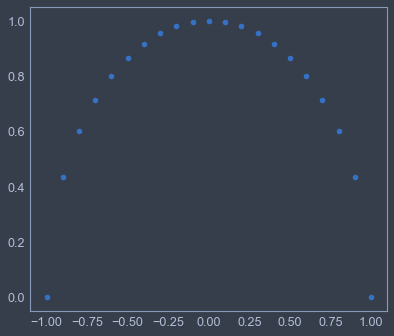

In [12]:
# let's plot it:
plt.plot( x,y, marker= 'o', linestyle ='none')

In [ ]:
# let's plot it:
plt.plot( x,y, marker= 'o', linestyle ='none')

In [ ]:
# add the breakpoint now:

for i in range( len( x ) ):
    breakpoint()          
    
    q1   = x[ i ]   ** 2.
    q2   = 1
    

    a      = 5.
    b      = 2.
    y1     = q2 - q1 / ( a **2. )
    
    
    y[ i ] = np.sqrt(y1 * (b**2.) )

## Recursion & the Infinite recursion bug:

### so far we have seen it is fine to call a function from your main program, and you may even have a function calling another function like here:

In [13]:
import string

def process_file(filename):
    hist = dict()
    fp = open(filename)
    for line in fp:
        process_line(line, hist)
        
    return(hist)


def process_line(line, hist):

    line = line.replace('-', ' ')

    for word in line.split():

        word = word.strip(string.punctuation + string.whitespace)
        word = word.lower()
        hist[word] = hist.get(word, 0) + 1
        
        

process_file( 'emma.txt')



{'the': 5266,
 'project': 31,
 'gutenberg': 21,
 'etext': 30,
 'of': 4339,
 'emma': 789,
 'by': 595,
 'jane': 285,
 'austen': 4,
 'please': 39,
 'take': 122,
 'a': 3155,
 'look': 123,
 'at': 1041,
 'important': 21,
 'information': 29,
 'in': 2199,
 'this': 558,
 'header': 1,
 'we': 368,
 'encourage': 4,
 'you': 2053,
 'to': 5295,
 'keep': 34,
 'file': 4,
 'on': 701,
 'your': 376,
 'own': 304,
 'disk': 4,
 'keeping': 12,
 'an': 467,
 'electronic': 2,
 'path': 5,
 'open': 42,
 'for': 1371,
 'next': 65,
 'readers': 3,
 'do': 648,
 'not': 2161,
 'remove': 7,
 'welcome': 17,
 'world': 82,
 'free': 8,
 'plain': 26,
 'vanilla': 1,
 'texts': 2,
 'etexts': 10,
 'readable': 3,
 'both': 87,
 'humans': 1,
 'and': 4931,
 'computers': 1,
 'since': 67,
 '1971': 1,
 'these': 70,
 'prepared': 17,
 'hundreds': 2,
 'volunteers': 1,
 'donations': 4,
 'contacting': 1,
 'get': 77,
 'further': 2,
 'is': 1261,
 'included': 6,
 'below': 7,
 'need': 44,
 'august': 5,
 '1994': 1,
 '158': 1,
 'date': 7,
 'last': 

### If a function calls itself, it is called “recursion”
 
- Useful for many tasks, especially when the number of calls is unknown 
- factorial
- Typically have an if statement that terminates recursion


### **BUT:** Beware of calling too many times! by default ~1e3 calls is the limit in Python (you can change it though...see below)

- Iteration is generally clearer and faster if you know how many iterations & takes less memory

- Pre-allocating large arrays is much faster and more memory efficient than appending to existing arrays!


In [14]:
#e.g., from ThinkPython2:

def countdown(n):
    if n <= 0:
        print('Blastoff!')
    else:
        print(n)
        countdown(n-1)
        


In [15]:
countdown(3)

3
2
1
Blastoff!


#### If a recursion never reaches a base case (the "if n<=0" above), it goes on making recursive calls forever, and the program never terminates. This is known as *infinite recursion*.


#### obviously not good. In an infinite loop program will go on forever; here you'll reach the max depth and program will err

In [16]:
def countdown(n):
    
        print(n)
        countdown(n-1)

In [ ]:
countdown(1002)

1002
1001
1000
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
951
950
949
948
947
946
945
944
943
942
941
940
939
938
937
936
935
934
933
932
931
930
929
928
927
926
925
924
923
922
921
920
919
918
917
916
915
914
913
912
911
910
909
908
907
906
905
904
903
902
901
900
899
898
897
896
895
894
893
892
891
890
889
888
887
886
885
884
883
882
881
880
879
878
877
876
875
874
873
872
871
870
869
868
867
866
865
864
863
862
861
860
859
858
857
856
855
854
853
852
851
850
849
848
847
846
845
844
843
842
841
840
839
838
837
836
835
834
833
832
831
830
829
828
827
826
825
824
823
822
821
820
819
818
817
816
815
814
813
812
811
810
809
808
807
806
805
804
803
802
801
800
799
798
797
796
795
794
793
792
791
790
789
788
787
786
785
784
783
782
781
780
779
778
777
776
775
774
773
772
771
770
769
768
767
766
765
764
763
762
761
760
759
758
757
756
755
754
7

In [3]:
#from geeks for geeks:

# A simple recursive function to compute the factorial of a number 
def fact(n): 
  
    if(n == 0): 
        return 1
  
    return n * fact(n - 1) 


# taking input 
    
f = int(input('Enter the number: \n')) 
  
print(fact(f)) 

Enter the number: 
100
93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000


In [ ]:
f = int(input('Enter the number: \n')) 
print(fact(f)) 

In [1]:
#if I would REALLY need to calculate this number I could change the recursion limit:
import sys 
sys.setrecursionlimit(10**6) 


In [4]:
f = int(input('Enter the number: \n')) 
print(fact(f)) 

Enter the number: 
1000
4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610